## Identification of promising e-commerce acquisition targets- Sheethal Joseph

## The task is to clean and analyze the data to profile the sellers present and develop selection criteria to identify the best or most promising sellers in this dataset.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import re

## Reading the CSV file 

In [2]:
data = pd.read_csv('Sample_Longlist_Data.csv', encoding='latin-1')

## Displaying the first few rows of the DataFrame

In [3]:
data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,15-Nov-20,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,NaN,NaN,NaN
1,15-Nov-20,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN,NaN,NaN
2,15-Nov-20,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN
3,15-Nov-20,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,?????????????????????????????1901?450000CN,...,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN
4,15-Nov-20,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN


## Outputting the number of columns in the DataFrame

In [4]:
len(data.columns)

21

In [5]:
data.info

<bound method DataFrame.info of      Date Added category   sellerlink    sellerlink-url  \
0     15-Nov-20   Garden     Seller 1     Seller 1-link   
1     15-Nov-20   Garden     Seller 2     Seller 2-link   
2     15-Nov-20   Garden     Seller 3     Seller 3-link   
3     15-Nov-20   Garden     Seller 4     Seller 4-link   
4     15-Nov-20   Garden     Seller 5     Seller 5-link   
...         ...      ...          ...               ...   
1834  15-Nov-20   Garden  Seller 1835  Seller 1835-link   
1835  15-Nov-20   Garden  Seller 1836  Seller 1836-link   
1836  15-Nov-20   Garden  Seller 1837  Seller 1837-link   
1837  15-Nov-20   Garden  Seller 1838  Seller 1838-link   
1838  15-Nov-20   Garden  Seller 1839  Seller 1839-link   

            sellerstorefront-url            sellerproductcount  \
0        Seller 1-storefrontlink  1-16 of over 100,000 results   
1        Seller 2-storefrontlink                           NaN   
2        Seller 3-storefrontlink    1-16 of over 2,000 result

In [6]:
data.describe()

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Unnamed: 18,Unnamed: 19,Unnamed: 20
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,0.0,0.0,0.0
mean,6.951060,5.808592,7.632409,12.312670,1399.745514,765.173464,NaN,NaN,NaN
std,6.232073,18.117027,19.902394,23.435871,6204.123987,3817.355945,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,5.000000,0.000000,0.000000,0.000000,3.000000,1.000000,NaN,NaN,NaN
75%,15.000000,0.000000,4.000000,14.000000,176.500000,87.500000,NaN,NaN,NaN
max,16.000000,100.000000,100.000000,100.000000,86856.000000,70732.000000,NaN,NaN,NaN


In [7]:
data.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')

## Dropping the columns 'Unnamed: 18', 'Unnamed: 19', and 'Unnamed: 20' from the DataFrame

In [8]:
data['Unnamed: 18'].isnull().value_counts()

True    1839
Name: Unnamed: 18, dtype: int64

In [9]:
data['Unnamed: 19'].isnull().value_counts()

True    1839
Name: Unnamed: 19, dtype: int64

In [10]:
data['Unnamed: 20'].isnull().value_counts()

True    1839
Name: Unnamed: 20, dtype: int64

In [11]:
data.drop(['Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)


In [12]:
len(data.columns)

18

## Calculating the number of null values in each column of the DataFrame.

In [13]:
data.isnull().sum()

Date Added                                             0
category                                               0
sellerlink                                             0
sellerlink-url                                         0
sellerstorefront-url                                   0
sellerproductcount                                   326
sellerratings                                        428
sellerdetails                                         27
seller business name                                  56
businessaddress                                       75
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Hero Product 1 #ratings                                0
Hero Product 2 #ratings                                0
Sample brand name                                      4
Sample Brand URL               

## Creating a new DataFrame data_dropped by removing rows with any null values from the original DataFrame.

In [14]:
data_dropped = data.dropna(how='any')

In [15]:
data_dropped.isnull().sum()

Date Added                                           0
category                                             0
sellerlink                                           0
sellerlink-url                                       0
sellerstorefront-url                                 0
sellerproductcount                                   0
sellerratings                                        0
sellerdetails                                        0
seller business name                                 0
businessaddress                                      0
Count of seller brands                               0
Max % of negative seller ratings - last 30 days      0
Max % of negative seller ratings - last 90 days      0
Max % of negative seller ratings - last 12 months    0
Hero Product 1 #ratings                              0
Hero Product 2 #ratings                              0
Sample brand name                                    0
Sample Brand URL                                     0
dtype: int

## Checking the data type of the 'sellerproductcount' column

In [16]:
data_dropped.sellerproductcount.dtype

dtype('O')

## Counting the occurrences of each unique value in the 'sellerproductcount' column.


In [17]:
data_dropped.sellerproductcount.value_counts()

1-16 of over 1,000 results     157
1-16 of over 2,000 results     126
1-16 of over 10,000 results     91
1-16 of over 3,000 results      76
1-16 of over 4,000 results      56
                              ... 
1-16 of 347 results              1
1-16 of 782 results              1
1-16 of 556 results              1
1-16 of 969 results              1
12 results                       1
Name: sellerproductcount, Length: 330, dtype: int64

In [18]:
data_dropped.shape

(1159, 18)

## Parsing out the useful data for the column 'sellerproductcount' and 'sellerratings'

In [19]:
# Function to extract the product count from text using regular expressions
def extract_product_count(text):
    # print(text)
    match = re.search(r'over ([\d,]+)', text)
    if match:
        count_str = match.group(1).replace(',', '')
        return int(count_str)
    else:
        match = re.search(r'1-16 of ([\d,]+)', text)
        if match:
            count_str = match.group(1).replace(',', '')
            return int(count_str)
        else:
            return None

# Example usage with a pandas Series
column = pd.Series(data_dropped.sellerproductcount)
data_dropped.sellerproductcount = column.apply(extract_product_count)



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
data_dropped.sellerproductcount.isna().sum()

6

In [21]:
data_dropped.sellerproductcount.loc[[126, 797]]

126   NaN
797   NaN
Name: sellerproductcount, dtype: float64

In [22]:
data_dropped[data_dropped.isnull().any(axis=1)]

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
126,15-Nov-20,Garden,Seller 127,Seller 127-link,Seller 127-storefrontlink,NaN,100% positive in the last 12 months (17 ratings),Impressum:\n wettertuete.de\n Kippert & Willem...,Business Name:Kippert & Willemsen GbR,Bahnallee19StadtlohnNordrhein-Westfalen48703DE,2,0,0,0,49,20,wettertuete.de,https://www.amazon.de/-/en/wettertuete-de/b/re...
797,15-Nov-20,Garden,Seller 798,Seller 798-link,Seller 798-storefrontlink,NaN,76% positive lifetime (17 total ratings),Varomorus is committed to providing each custo...,Business Name:VAROMORUS LLC,625 Antioch Ave APT 104Fort LauderdaleFL33304-...,2,0,0,50,265,41,Varomorus,https://www.amazon.de/-/en/Varomorus/b/ref=bl_...
879,15-Nov-20,Garden,Seller 880,Seller 880-link,Seller 880-storefrontlink,NaN,93% positive in the last 12 months (123 ratings),"Leckerer Saft, gesunder Saft mit einem Slowjui...",Business Name:Terona B.V.,Meerhof 28LeidenZuid Holland2321THNL,3,8,9,6,742,461,Visit the VITA5 Store,https://www.amazon.de/-/en/stores/VITA5/page/B...
880,15-Nov-20,Garden,Seller 881,Seller 881-link,Seller 881-storefrontlink,NaN,100% positive lifetime (6 total ratings),vitabird is committed to providing each custom...,Business Name:VitaBird UG (haftungsbeschrnkt),Hans-Mielich-Str.27MnchenBayern81543DE,2,0,0,0,5,1,Metallfuxx,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
998,15-Nov-20,Garden,Seller 999,Seller 999-link,Seller 999-storefrontlink,NaN,79% positive in the last 12 months (14 ratings),Weihnachtsbaumland\nStephan Mtherich\nBergstr...,Business Name:Weihnachtsbaumland,Bergstra§e33Eslohe59889DE,1,0,0,7,58,50,Weihnachtsbaumland,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1525,15-Nov-20,Garden,Seller 1526,Seller 1526-link,Seller 1526-storefrontlink,NaN,100% positive in the last 12 months (24 ratings),Impressum Angaben gem§ ¤ 5 TMG: NM-Wood Gmb...,Business Name:NM-Wood Gmbh,Robert-Koch-Strasse2Bexbach66450DE,5,0,0,0,94,13,Visit the GrnerGarten Store,https://www.amazon.de/-/en/stores/Gr%C3%BCnerG...


In [23]:
data_dropped.sellerproductcount.dtypes

dtype('float64')

In [24]:
data_dropped.sellerproductcount.value_counts()

1000.0     157
2000.0     126
10000.0     91
3000.0      76
4000.0      56
          ... 
769.0        1
224.0        1
954.0        1
107.0        1
620.0        1
Name: sellerproductcount, Length: 324, dtype: int64

In [25]:
data_dropped.sellerratings

0       88% positive in the last 12 months (118 ratings)
2        85% positive in the last 12 months (75 ratings)
4        81% positive in the last 12 months (52 ratings)
8               100% positive lifetime (4 total ratings)
10              100% positive lifetime (3 total ratings)
                              ...                       
1833            87% positive lifetime (15 total ratings)
1834     83% positive in the last 12 months (46 ratings)
1836              0% positive lifetime (1 total ratings)
1837             67% positive lifetime (3 total ratings)
1838            100% positive lifetime (2 total ratings)
Name: sellerratings, Length: 1159, dtype: object

In [26]:
# Function to extract seller percentage and seller ratings
def extract_info(text):
    pattern = r'(\d+)% positive.*\((\d+)\D*\)'
    match = re.search(pattern, text)
    if match:
        percentage = int(match.group(1))
        ratings = int(match.group(2))
        return percentage, ratings
    else:
        return None, None

# Apply the function to the series and create two separate series
column = pd.Series(data_dropped.sellerratings)
data_dropped['sellerratings_percentage'], data_dropped['sellerratings_number'] = column.apply(extract_info).str




<ipython-input-26-28b7b06ea9e7>:14: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data_dropped['sellerratings_percentage'], data_dropped['sellerratings_number'] = column.apply(extract_info).str
<ipython-input-26-28b7b06ea9e7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped['sellerratings_percentage'], data_dropped['sellerratings_number'] = column.apply(extract_info).str


In [27]:
data_dropped[['sellerratings', 'sellerratings_percentage', 'sellerratings_number', 'sellerproductcount']]

,sellerratings,sellerratings_percentage,sellerratings_number,sellerproductcount
0,88% positive in the last 12 months (118 ratings),88,118,100000.0
2,85% positive in the last 12 months (75 ratings),85,75,2000.0
4,81% positive in the last 12 months (52 ratings),81,52,1000.0
8,100% positive lifetime (4 total ratings),100,4,133.0
10,100% positive lifetime (3 total ratings),100,3,4000.0
...,...,...,...,...
1833,87% positive lifetime (15 total ratings),87,15,10000.0
1834,83% positive in the last 12 months (46 ratings),83,46,2000.0
1836,0% positive lifetime (1 total ratings),0,1,10000.0
1837,67% positive lifetime (3 total ratings),67,3,473.0


In [28]:
data_dropped.sellerproductcount.value_counts()

1000.0     157
2000.0     126
10000.0     91
3000.0      76
4000.0      56
          ... 
769.0        1
224.0        1
954.0        1
107.0        1
620.0        1
Name: sellerproductcount, Length: 324, dtype: int64

In [29]:
data_dropped.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL', 'sellerratings_percentage',
       'sellerratings_number'],
      dtype='object')

## Parsing out the useful data from the coulmn 'sellerdetails' 

In [30]:
data_dropped.sellerdetails.iloc[67]

'Impressum: Kemper Solar GmbH Einener Dorfbauerschaft 42 48231 Warendorf Tel. 02584517 Fax:025848148 Mail: pv@solar-kemper.de Gesch\x8aftsf\x9fhrer: Guido Kemper Handelsregister: Amtsgericht M\x9fnster, HRB 12481 Umsatzsteuer-Identifikationsnummer: DE 270281117 Kemper Solar GmbH besteht seit 2010. Unser Haupt Gesch\x8aftsfeld besteht in der Planung und Bau von Photovoltaiksystemen und autarken Stra§enleuchten weltweit.  \nDie Europ\x8aische Kommission bietet eine Onlineplattform f\x9fr Streitbeilegung an, die Sie hi...'

In [31]:
data_dropped.sellerdetails.iloc[142]

'Impressumaquapro2000 GmbHGesch\x8aftsf\x9fhrer: Stefan MarkusRechtsform: GmbHHRB 200856 Amtsgericht StadthagenSt.Nr. 324/5750/1919Umsatzsteuer-Identifikationsnummer gem\x8a§ ¤ 27 a Umsatzsteuergesetz:\nDE258529603Êaquapro2000 GmbHSteinberger Strasse 13 CÊD-31675 B\x9fckeburgGermanyTelefon / FaxTel. ++49 (0) 5722 88 88 620Fax: ++49 (0) 5722 88 88 622email:ÊÊaquaPro2000@hotmail.de\n\n\nDie Europ\x8aische Kommission bietet eine Onlineplattform f\x9fr Streitbeilegung an, die Sie hier finden: https://ec.europa.eu/consumers/od...'

In [32]:
!pip install --user email_validator

### Importing the necessary library email_validator for email address validation and defining a function extract_email_addresses to extract and validate email addresses, mobile numbers, and telephone numbers from text. 
### Applying the function to the 'sellerdetails' column in the data_dropped DataFrame to extract the email addresses, mobile numbers, and telephone numbers. 
### Creating a new column 'Valid_Emails' to store the extracted values.

In [33]:
from email_validator import validate_email, EmailNotValidError

# Function to extract and validate email addresses

def extract_email_addresses(text):
    words = text.split()
    email_addresses = []
    mobile_numbers = []
    telephone_numbers = []

    for word in words:
        try:
            email = validate_email(word)
            email_addresses.append(email.email)
    #     except EmailNotValidError:
    #         pass
    # # print(email_addresses)
    # return email_addresses


        except EmailNotValidError:
            # Check if the word matches a mobile number pattern
            mobile_number_match = re.match(r'(\+\d{1,3}\s?)?(\d{3,4}){1,2}\s?\d{3,4}', word)
            if mobile_number_match:
                mobile_numbers.append(word)

            # Check if the word matches a telephone number pattern
            telephone_number_match = re.match(r'\d{3,4}\s?\d{3,4}\s?\d{3,4}', word)
            if telephone_number_match:
                telephone_numbers.append(word)

    return email_addresses, mobile_numbers, telephone_numbers

# Apply the function to the "sellerdetails" column
column = pd.Series(data_dropped.sellerdetails)
data_dropped['Valid_Emails'] = column.apply(extract_email_addresses)


<ipython-input-33-74376167196d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped['Valid_Emails'] = column.apply(extract_email_addresses)


In [34]:
data_dropped['Valid_Emails'].head(20)


0                                          ([], [], [])
2                                          ([], [], [])
4                                          ([], [], [])
8                                          ([], [], [])
10                                         ([], [], [])
11                                         ([], [], [])
12                                         ([], [], [])
14    ([webmaster@9pm-store.de], [015140008562], [01...
16                                         ([], [], [])
18                                         ([], [], [])
22                                         ([], [], [])
23              ([bib.beckum@blumenbecker.com], [], [])
24                                         ([], [], [])
25    ([amazon@boni-shop.com], [283905130, 206702], ...
26                                         ([], [], [])
28                                         ([], [], [])
30    ([info@deinegartenwelt.de], [022342509631], [0...
31                                         ([], 

In [35]:
data_dropped['Valid_Emails'].iloc[1]

([], [], [])

In [36]:
data_dropped[['Email', 'MobileNumber', 'TelNumber']]= data_dropped['Valid_Emails'].tolist()

<ipython-input-36-66d80099e264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped[['Email', 'MobileNumber', 'TelNumber']]= data_dropped['Valid_Emails'].tolist()
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [37]:
data_dropped.head(20)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,sellerratings_percentage,sellerratings_number,Valid_Emails,Email,MobileNumber,TelNumber
0,15-Nov-20,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88,118,"([], [], [])",[],[],[]
2,15-Nov-20,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,2000.0,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,85,75,"([], [], [])",[],[],[]
4,15-Nov-20,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,1000.0,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,81,52,"([], [], [])",[],[],[]
8,15-Nov-20,Garden,Seller 9,Seller 9-link,Seller 9-storefrontlink,133.0,100% positive lifetime (4 total ratings),7WallArts is committed to providing each custo...,Business Name:SEVEN WALL ARTS (XIAMEN) LIMITED,No.267 Northern Industrial Zone Jinli VillageH...,...,65,9,SEVEN WALL ARTS,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100,4,"([], [], [])",[],[],[]
10,15-Nov-20,Garden,Seller 11,Seller 11-link,Seller 11-storefrontlink,4000.0,100% positive lifetime (3 total ratings),888hahahahahaha is committed to providing each...,Business Name:LinFenJingJiKaiFaQuGaoWeiWeiPiJu...,KaiFaQuHeFenLuWuZhouGuoJiGuangChang2CengL221Ha...,...,2,0,TYXTYX,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100,3,"([], [], [])",[],[],[]
11,15-Nov-20,Garden,Seller 12,Seller 12-link,Seller 12-storefrontlink,1000.0,63% positive lifetime (8 total ratings),88IrmaTay is committed to providing each custo...,Business Name:shenzhenshizhinengyifangkejiyoux...,longgangqulonggangjiedaoainanlu366haoqizhengyu...,...,2,2,Wakauto,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,63,8,"([], [], [])",[],[],[]
12,15-Nov-20,Garden,Seller 13,Seller 13-link,Seller 13-storefrontlink,4000.0,0% positive lifetime (1 total ratings),8IQZ5YI5FI is committed to providing each cust...,Business Name:beijingbeiheguojinonglinkejifazh...,beijingshichangpingquxiaotangshanzhenshashunlu...,...,8469,444,MGZDH,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,0,1,"([], [], [])",[],[],[]
14,15-Nov-20,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,919.0,97% positive in the last 12 months (116 ratings),Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,...,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,97,116,"([webmaster@9pm-store.de], [015140008562], [01...",[webmaster@9pm-store.de],[015140008562],[015140008562]
16,15-Nov-20,Garden,Seller 17,Seller 17-link,Seller 17-storefrontlink,60000.0,100% positive lifetime (2 total ratings),980 uiyp is committed to providing each custom...,Business Name:guanyunmomomaoyiyouxiangongsi,shuguangshequbaihuaxiang12haoyishanzhenguanyun...,...,12,7,Shishij1,https://www.amazon.de/-/en/s/ref=bl_sl_s_ap_we...,100,2,"([], [], [])",[],[],[]
18,15-Nov-20,Garden,Seller 19,Seller 19-link,Seller 19-storefrontlink,1000.0,67% positive lifetime (9 total ratings),99gaodashang is committed to providing each cu...,Business Name:zhengzhoutianmengxingjinchukouma...,yinronghuayuan22haolou1danyuan7ceng28haozhongy...,...,12,4,WODT,https://www.amazon.de/-/en/s/ref=bl_dp_

### Defining a lambda function replace_empty_with_nan to replace empty lists with NaN.

### Applying the function to the 'Email', 'MobileNumber', and 'TelNumber' columns in the data_dropped DataFrame to replace empty lists with NaN.

In [38]:
# Function to replace empty lists with NaN
replace_empty_with_nan = lambda x: np.nan if len(x) == 0 else x

# Apply the function to the column
data_dropped['Email'] = data_dropped['Email'].apply(replace_empty_with_nan)

data_dropped['MobileNumber'] = data_dropped['MobileNumber'].apply(replace_empty_with_nan)
data_dropped['TelNumber'] = data_dropped['TelNumber'].apply(replace_empty_with_nan)




<ipython-input-38-358966348405>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped['Email'] = data_dropped['Email'].apply(replace_empty_with_nan)
<ipython-input-38-358966348405>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped['MobileNumber'] = data_dropped['MobileNumber'].apply(replace_empty_with_nan)
<ipython-input-38-358966348405>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [39]:
data_dropped.drop(['Valid_Emails', 'sellerratings', 'sellerdetails'], inplace=True, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
data_dropped.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'seller business name',
       'businessaddress', 'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL', 'sellerratings_percentage',
       'sellerratings_number', 'Email', 'MobileNumber', 'TelNumber'],
      dtype='object')

In [41]:
data_dropped.sellerproductcount.value_counts()

1000.0     157
2000.0     126
10000.0     91
3000.0      76
4000.0      56
          ... 
769.0        1
224.0        1
954.0        1
107.0        1
620.0        1
Name: sellerproductcount, Length: 324, dtype: int64

## Parsing out the useful data from the column 'businessaddress'

In [42]:
data_dropped.businessaddress

0       411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...
2       zhongnanshijicheng27zhuang1410haochongchuanqun...
4       minzhidadaoshaxialaocun94dongA901longhuaxinqus...
8       No.267 Northern Industrial Zone Jinli VillageH...
10      KaiFaQuHeFenLuWuZhouGuoJiGuangChang2CengL221Ha...
                              ...                        
1833    504, Elevator B, Fashion International, No.16,...
1834    Longhuaxinqu Longhuajiedao YousongDiergongyequ...
1836    lankaoxianzhangjunmuzhenzhengzhuangcunerzukaif...
1837    bei san huan da ming gong jian cai shi changba...
1838    honggutanxinquhuanandongerlu99haolongxiangyuan...
Name: businessaddress, Length: 1159, dtype: object

### Extracting the last two characters from the 'businessaddress' column in the data_dropped DataFrame to get the registered country.

In [43]:
data_dropped['registered_country'] = data_dropped.businessaddress.str[-2:]

<ipython-input-43-d4554f386019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped['registered_country'] = data_dropped.businessaddress.str[-2:]


In [44]:

data_dropped.registered_country.value_counts()

CN    727
DE    301
GB     38
IT     18
US     13
ES     11
NL      9
HK      9
FR      9
AT      6
PL      4
IN      4
CZ      2
JP      2
CH      1
BE      1
SE      1
TH      1
IE      1
AU      1
Name: registered_country, dtype: int64

### Filtering the data_dropped DataFrame to exclude rows where the registered country is 'CN' (China).

In [45]:
data_dropped = data_dropped[data_dropped.registered_country !='CN']

In [46]:
data_dropped.sellerproductcount.value_counts()

1000.0     49
2000.0     37
3000.0     25
10000.0    20
4000.0     11
           ..
741.0       1
829.0       1
284.0       1
30.0        1
91.0        1
Name: sellerproductcount, Length: 210, dtype: int64

In [47]:
data_dropped.head(20)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,...,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,sellerratings_percentage,sellerratings_number,Email,MobileNumber,TelNumber,registered_country
0,15-Nov-20,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,...,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88,118,NaN,NaN,NaN,US
14,15-Nov-20,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,919.0,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,0,...,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,97,116,[webmaster@9pm-store.de],[015140008562],[015140008562],DE
22,15-Nov-20,Garden,Seller 23,Seller 23-link,Seller 23-storefrontlink,40000.0,Business Name:MADEWELL SUPPLY INC,90 BROAD ST 2ND FLOORNEW YORKNY10004-2205US,16,0,...,10538,8293,Visit the Seville Classics Store,https://www.amazon.de/-/en/stores/Seville+Clas...,100,10,NaN,NaN,NaN,US
23,15-Nov-20,Garden,Seller 24,Seller 24-link,Seller 24-storefrontlink,100000.0,Business Name:Blumenbecker Industriebedarf GmbH,Sudhoferweg 99-107BeckumNRW59269DE,15,15,...,30139,11182,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,88,3134,[bib.beckum@blumenbecker.com],NaN,NaN,DE
24,15-Nov-20,Garden,Seller 25,Seller 25-link,Seller 25-storefrontlink,3000.0,Business Name:Jrg Mller & Petra Scheerer GbR,Miranderstr.21Korntal-Mnchingen70825DE,15,3,...,3286,3079,Neudorff,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,97,610,NaN,NaN,NaN,DE
25,15-Nov-20,Garden,Seller 26,Seller 26-link,Seller 26-storefrontlink,2000.0,Business Name:boni-shop.com OHG,Wissmannstrasse58Delmenhorst27755DE,15,1,...,2128,1759,Nexa Lotte,https://www.amazon.de/-/en/Nexa-Lotte/b/ref=bl...,98,1488,[amazon@boni-shop.com],"[283905130, 206702]",[283905130],DE
26,15-Nov-20,Garden,Seller 27,Seller 27-link,Seller 27-storefrontlink,60000.0,Business Name:Bristol Fashion,3744 E Calle BarcelonaTUCSONAZ85716-5116US,16,29,...,37716,13566,Ray-Ban,https://www.amazon.de/-/en/Ray-Ban/b/ref=bl_dp...,79,119,NaN,NaN,NaN,US
30,15-Nov-20,Garden,Seller 31,Seller 31-link,Seller 31-storefrontlink,1000.0,Business Name:Daniel Vogeley und Christopher G...,Auf der Insel 20Pulheim50259DE,6,0,...,764,599,Visit the Deine Gartenwelt Store,https://www.amazon.de/-/en/stores/DeineGartenw...,99,1739,[info@deinegartenwelt.de],[022342509631],[022342509631],DE
31,15-Nov-20,Garden,Seller 32,Seller 32-link,Seller 32-storefrontlink,80000.0,Business Name:Dinan LLC,13300 ATLANTIC BLVD APT 416JACKSONVILLEFL32225...,16,0,...,10907,8836,Visit the Umbra Store,https://www.amazon.de/-/en/stores/Umbra/page/4...,82,38,NaN,NaN,NaN,US
33,15-Nov-20,Garden,Seller 34,Seller 34-link,Seller 34-storefrontlink,100000.0,Business Name:Tkog Iwy INC,708 3RD AVE FL 6THNew YorkNY10017-4201US,16,0,...,5262,3632,"Tightpac America, Inc.",https://www.amazon.de/-/en/Tightpac-America-In...,85,75,NaN,NaN,NaN,US


In [48]:
data_dropped.registered_country.value_counts()

DE    301
GB     38
IT     18
US     13
ES     11
HK      9
NL      9
FR      9
AT      6
PL      4
IN      4
JP      2
CZ      2
AU      1
BE      1
SE      1
CH      1
IE      1
TH      1
Name: registered_country, dtype: int64

### Parsing out the useful data from the column 'Hero Product 1 #ratings', 'Hero Product 2 #ratings'

In [49]:
data_dropped['Hero Product 1 #ratings'].value_counts()

5        7
3        5
0        4
10       4
7145     3
        ..
2228     1
3251     1
4786     1
689      1
13311    1
Name: Hero Product 1 #ratings, Length: 364, dtype: int64

In [50]:
data_dropped['Hero Product 2 #ratings'].value_counts()

0        7
4        7
13       4
2        4
41       4
        ..
13496    1
9398     1
7017     1
4274     1
4085     1
Name: Hero Product 2 #ratings, Length: 361, dtype: int64

In [51]:
data_dropped.shape

(432, 22)

In [52]:
data_dropped.describe()

,sellerproductcount,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,sellerratings_percentage,sellerratings_number
count,426.000000,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,6404.039906,12.222222,5.877315,5.80787,7.046296,5561.393519,3063.164352,91.300926,379.467593
std,18697.852910,5.105083,15.626180,11.75396,11.665790,11770.949790,7356.386978,11.037048,897.420968
min,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,9.000000,1.000000
25%,263.500000,10.000000,0.000000,0.00000,1.000000,222.500000,116.750000,89.000000,23.000000
50%,928.000000,15.000000,0.000000,1.00000,3.000000,1323.000000,607.000000,94.500000,87.500000
75%,3000.000000,16.000000,5.000000,7.00000,8.000000,5506.000000,2752.750000,98.000000,259.500000
max,200000.000000,16.000000,100.000000,100.00000,100.000000,86856.000000,70732.000000,100.000000,7465.000000


In [53]:
data_dropped.sellerproductcount.value_counts()

1000.0     49
2000.0     37
3000.0     25
10000.0    20
4000.0     11
           ..
741.0       1
829.0       1
284.0       1
30.0        1
91.0        1
Name: sellerproductcount, Length: 210, dtype: int64

In [54]:
data_dropped.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,...,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,sellerratings_percentage,sellerratings_number,Email,MobileNumber,TelNumber,registered_country
0,15-Nov-20,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,...,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88,118,NaN,NaN,NaN,US
14,15-Nov-20,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,919.0,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,0,...,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,97,116,[webmaster@9pm-store.de],[015140008562],[015140008562],DE
22,15-Nov-20,Garden,Seller 23,Seller 23-link,Seller 23-storefrontlink,40000.0,Business Name:MADEWELL SUPPLY INC,90 BROAD ST 2ND FLOORNEW YORKNY10004-2205US,16,0,...,10538,8293,Visit the Seville Classics Store,https://www.amazon.de/-/en/stores/Seville+Clas...,100,10,NaN,NaN,NaN,US
23,15-Nov-20,Garden,Seller 24,Seller 24-link,Seller 24-storefrontlink,100000.0,Business Name:Blumenbecker Industriebedarf GmbH,Sudhoferweg 99-107BeckumNRW59269DE,15,15,...,30139,11182,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,88,3134,[bib.beckum@blumenbecker.com],NaN,NaN,DE
24,15-Nov-20,Garden,Seller 25,Seller 25-link,Seller 25-storefrontlink,3000.0,Business Name:Jrg Mller & Petra Scheerer GbR,Miranderstr.21Korntal-Mnchingen70825DE,15,3,...,3286,3079,Neudorff,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,97,610,NaN,NaN,NaN,DE


In [55]:
data_dropped.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'seller business name',
       'businessaddress', 'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL', 'sellerratings_percentage',
       'sellerratings_number', 'Email', 'MobileNumber', 'TelNumber',
       'registered_country'],
      dtype='object')

### Creating a new DataFrame final_data by selecting specific columns from the data_dropped DataFrame

In [56]:
final_data = data_dropped[['category', 'sellerproductcount', 'seller business name',
       'businessaddress', 'Count of seller brands',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name',  'sellerratings_percentage',
       'sellerratings_number', 'Email', 'MobileNumber', 'TelNumber',
       'registered_country']]

In [57]:
final_data.sellerproductcount.value_counts()

1000.0     49
2000.0     37
3000.0     25
10000.0    20
4000.0     11
           ..
741.0       1
829.0       1
284.0       1
30.0        1
91.0        1
Name: sellerproductcount, Length: 210, dtype: int64

In [58]:
final_data

,category,sellerproductcount,seller business name,businessaddress,Count of seller brands,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerratings_percentage,sellerratings_number,Email,MobileNumber,TelNumber,registered_country
0,Garden,100000.0,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,5873,4957,Visit the YAMAZAKI Store,88,118,NaN,NaN,NaN,US
14,Garden,919.0,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,1446,921,Unbekannt,97,116,[webmaster@9pm-store.de],[015140008562],[015140008562],DE
22,Garden,40000.0,Business Name:MADEWELL SUPPLY INC,90 BROAD ST 2ND FLOORNEW YORKNY10004-2205US,16,10538,8293,Visit the Seville Classics Store,100,10,NaN,NaN,NaN,US
23,Garden,100000.0,Business Name:Blumenbecker Industriebedarf GmbH,Sudhoferweg 99-107BeckumNRW59269DE,15,30139,11182,Visit the tesa Store,88,3134,[bib.beckum@blumenbecker.com],NaN,NaN,DE
24,Garden,3000.0,Business Name:Jrg Mller & Petra Scheerer GbR,Miranderstr.21Korntal-Mnchingen70825DE,15,3286,3079,Neudorff,97,610,NaN,NaN,NaN,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,Garden,100000.0,Business Name:Zoreno Versandhandel GmbH,Blegistrasse 25BaarZG6340CH,16,25802,4979,(blank),98,2630,[ade.support@zoreno.com],NaN,NaN,CH
1785,Garden,285.0,Business Name:ZORGTHUISWINKEL.NL,industriestraat 1RijenNoord brabant5121LENL,15,2043,1134,St Helens Home and Garden,100,3,NaN,NaN,NaN,NL
1808,Garden,52.0,Business Name:AD-ACCESS-Zndholz Riesa GmbH,Paul-Greifzu-Stra§e22Riesa01591DE,8,65,41,NOLA,100,16,NaN,NaN,NaN,DE
1814,Garden,1000.0,Business Name:Reinhard Joormann -FansandTrends...,Im Stadtsfeld 55Dorsten46282DE,15,636,466,Star-Max,91,3075,"[r.joormann@googlemail.com, r.joormann@googlem...","[023626057826, 814772247]","[023626057826, 814772247]",DE


### Removing the string 'Business Name:' from the 'seller business name' column in the final_data DataFrame.

In [59]:
final_data['seller business name'] = final_data['seller business name'].str.replace('Business Name:', '')

<ipython-input-59-2ad05e1cc63b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['seller business name'] = final_data['seller business name'].str.replace('Business Name:', '')


In [60]:
final_data.sellerproductcount.value_counts()

1000.0     49
2000.0     37
3000.0     25
10000.0    20
4000.0     11
           ..
741.0       1
829.0       1
284.0       1
30.0        1
91.0        1
Name: sellerproductcount, Length: 210, dtype: int64

In [61]:
final_data.columns

Index(['category', 'sellerproductcount', 'seller business name',
       'businessaddress', 'Count of seller brands', 'Hero Product 1 #ratings',
       'Hero Product 2 #ratings', 'Sample brand name',
       'sellerratings_percentage', 'sellerratings_number', 'Email',
       'MobileNumber', 'TelNumber', 'registered_country'],
      dtype='object')

### Creating a new DataFrame final_data_analyze by selecting specific columns from the final_data DataFrame.

In [62]:
 final_data_analyze = final_data[['seller business name','sellerproductcount',
       'Count of seller brands', 'Hero Product 1 #ratings',
       'Hero Product 2 #ratings', 'Sample brand name',
       'sellerratings_percentage', 'sellerratings_number',  'registered_country']]

In [63]:
final_data_analyze.sellerproductcount.value_counts()

1000.0     49
2000.0     37
3000.0     25
10000.0    20
4000.0     11
           ..
741.0       1
829.0       1
284.0       1
30.0        1
91.0        1
Name: sellerproductcount, Length: 210, dtype: int64

In [64]:
final_data_analyze

,seller business name,sellerproductcount,Count of seller brands,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerratings_percentage,sellerratings_number,registered_country
0,Lohas Living Inc,100000.0,16,5873,4957,Visit the YAMAZAKI Store,88,118,US
14,Oliver Mills,919.0,15,1446,921,Unbekannt,97,116,DE
22,MADEWELL SUPPLY INC,40000.0,16,10538,8293,Visit the Seville Classics Store,100,10,US
23,Blumenbecker Industriebedarf GmbH,100000.0,15,30139,11182,Visit the tesa Store,88,3134,DE
24,Jrg Mller & Petra Scheerer GbR,3000.0,15,3286,3079,Neudorff,97,610,DE
...,...,...,...,...,...,...,...,...,...
1784,Zoreno Versandhandel GmbH,100000.0,16,25802,4979,(blank),98,2630,CH
1785,ZORGTHUISWINKEL.NL,285.0,15,2043,1134,St Helens Home and Garden,100,3,NL
1808,AD-ACCESS-Zndholz Riesa GmbH,52.0,8,65,41,NOLA,100,16,DE
1814,Reinhard Joormann -FansandTrends- e.K.,1000.0,15,636,466,Star-Max,91,3075,DE


In [65]:
final_data_analyze.sellerproductcount.value_counts()

1000.0     49
2000.0     37
3000.0     25
10000.0    20
4000.0     11
           ..
741.0       1
829.0       1
284.0       1
30.0        1
91.0        1
Name: sellerproductcount, Length: 210, dtype: int64

In [66]:
final_data_analyze.isnull().sum()

seller business name        0
sellerproductcount          6
Count of seller brands      0
Hero Product 1 #ratings     0
Hero Product 2 #ratings     0
Sample brand name           0
sellerratings_percentage    0
sellerratings_number        0
registered_country          0
dtype: int64

### Identifying rows in the final_data_analyze DataFrame that contain null values in any column.

In [67]:
rows_with_nulls = final_data_analyze[final_data_analyze.isnull().any(axis=1)]

In [68]:
rows_with_nulls

,seller business name,sellerproductcount,Count of seller brands,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerratings_percentage,sellerratings_number,registered_country
126,Kippert & Willemsen GbR,NaN,2,49,20,wettertuete.de,100,17,DE
797,VAROMORUS LLC,NaN,2,265,41,Varomorus,76,17,US
879,Terona B.V.,NaN,3,742,461,Visit the VITA5 Store,93,123,NL
880,VitaBird UG (haftungsbeschrnkt),NaN,2,5,1,Metallfuxx,100,6,DE
998,Weihnachtsbaumland,NaN,1,58,50,Weihnachtsbaumland,79,14,DE
1525,NM-Wood Gmbh,NaN,5,94,13,Visit the GrnerGarten Store,100,24,DE


In [ ]:
## Manually inserting values inorder not to lose information

In [69]:
### indexes = [126, 797, 899, 880, 998, 1525]

## Values to insert
##values = [15, 8, np.nan, 9, 5, 16]

### Insert values at specific indexes in the "seller product counts" column
### for index, value in zip(indexes, values):
##        final_data_analyze.at[index, 'sellerproductcount'] = value

In [70]:
final_data_analyze.isnull().sum()

seller business name        0
sellerproductcount          6
Count of seller brands      0
Hero Product 1 #ratings     0
Hero Product 2 #ratings     0
Sample brand name           0
sellerratings_percentage    0
sellerratings_number        0
registered_country          0
dtype: int64

### Dropping rows with null values from the final_data_analyze DataFrame.


In [73]:
final_data_analyze = final_data_analyze.dropna()

In [74]:
final_data_analyze.isnull().sum()

seller business name        0
sellerproductcount          0
Count of seller brands      0
Hero Product 1 #ratings     0
Hero Product 2 #ratings     0
Sample brand name           0
sellerratings_percentage    0
sellerratings_number        0
registered_country          0
dtype: int64

### Inputing the dataframe 'final_data_analyze' which contains the cleaned data

In [75]:
final_data_analyze

,seller business name,sellerproductcount,Count of seller brands,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerratings_percentage,sellerratings_number,registered_country
0,Lohas Living Inc,100000.0,16,5873,4957,Visit the YAMAZAKI Store,88,118,US
14,Oliver Mills,919.0,15,1446,921,Unbekannt,97,116,DE
22,MADEWELL SUPPLY INC,40000.0,16,10538,8293,Visit the Seville Classics Store,100,10,US
23,Blumenbecker Industriebedarf GmbH,100000.0,15,30139,11182,Visit the tesa Store,88,3134,DE
24,Jrg Mller & Petra Scheerer GbR,3000.0,15,3286,3079,Neudorff,97,610,DE
...,...,...,...,...,...,...,...,...,...
1784,Zoreno Versandhandel GmbH,100000.0,16,25802,4979,(blank),98,2630,CH
1785,ZORGTHUISWINKEL.NL,285.0,15,2043,1134,St Helens Home and Garden,100,3,NL
1808,AD-ACCESS-Zndholz Riesa GmbH,52.0,8,65,41,NOLA,100,16,DE
1814,Reinhard Joormann -FansandTrends- e.K.,1000.0,15,636,466,Star-Max,91,3075,DE


## Defining Selection Criteria

In [76]:
# Define the selection criteria
criteria = (
    (final_data_analyze['sellerproductcount'] > 100) &
    (final_data_analyze['sellerratings_percentage'] >= 90) &
    (final_data_analyze['sellerratings_number'] > 100) &
    (final_data_analyze['Count of seller brands'] >= 5)
)

# Filter the DataFrame using the selection criteria
selected_sellers = final_data_analyze[criteria].copy()


In [77]:
selected_sellers

,seller business name,sellerproductcount,Count of seller brands,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerratings_percentage,sellerratings_number,registered_country
14,Oliver Mills,919.0,15,1446,921,Unbekannt,97,116,DE
24,Jrg Mller & Petra Scheerer GbR,3000.0,15,3286,3079,Neudorff,97,610,DE
25,boni-shop.com OHG,2000.0,15,2128,1759,Nexa Lotte,98,1488,DE
30,Daniel Vogeley und Christopher Gemander GbR,1000.0,6,764,599,Visit the Deine Gartenwelt Store,99,1739,DE
36,itenga GmbH,50000.0,15,40683,18910,Visit the Vileda Store,91,5150,DE
...,...,...,...,...,...,...,...,...,...
1776,"Zoomeister, K. Hoffmeister",442.0,15,374,139,Zoomeister,96,106,DE
1780,Matthias Lchelt Versandhandel,1000.0,14,601,321,Skyline,97,631,DE
1781,Daniels Zoo & Aquaristik UG (haftungsbeschrnkt),400.0,14,3682,1450,(blank),91,196,DE
1784,Zoreno Versandhandel GmbH,100000.0,16,25802,4979,(blank),98,2630,CH


In [80]:
# Print the number of selected sellers
num_selected_sellers = len(selected_sellers)
print(f"Number of selected sellers: {num_selected_sellers}")

# Display the selected sellers
selected_sellers.head()


Number of selected sellers: 144


,seller business name,sellerproductcount,Count of seller brands,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerratings_percentage,sellerratings_number,registered_country
14,Oliver Mills,919.0,15,1446,921,Unbekannt,97,116,DE
24,Jrg Mller & Petra Scheerer GbR,3000.0,15,3286,3079,Neudorff,97,610,DE
25,boni-shop.com OHG,2000.0,15,2128,1759,Nexa Lotte,98,1488,DE
30,Daniel Vogeley und Christopher Gemander GbR,1000.0,6,764,599,Visit the Deine Gartenwelt Store,99,1739,DE
36,itenga GmbH,50000.0,15,40683,18910,Visit the Vileda Store,91,5150,DE


## Analyze the Selected Sellers



In [81]:
# Calculate summary statistics for the selected sellers
selected_sellers_stats = selected_sellers.describe()
selected_sellers_stats

,sellerproductcount,Count of seller brands,Hero Product 1 #ratings,Hero Product 2 #ratings,sellerratings_percentage,sellerratings_number
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,7115.354167,14.395833,8278.180556,4655.493056,95.458333,813.548611
std,16924.239017,2.452967,15413.970629,10223.787719,2.691284,1223.259550
min,112.000000,5.000000,5.000000,0.000000,90.000000,105.000000
25%,801.000000,14.000000,774.000000,472.000000,93.000000,187.000000
50%,1000.000000,15.000000,2464.000000,1527.500000,96.000000,306.000000
75%,5000.000000,16.000000,7253.500000,4389.500000,98.000000,843.250000
max,100000.000000,16.000000,86856.000000,70732.000000,100.000000,7465.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 154 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 159 missing from current font.
 

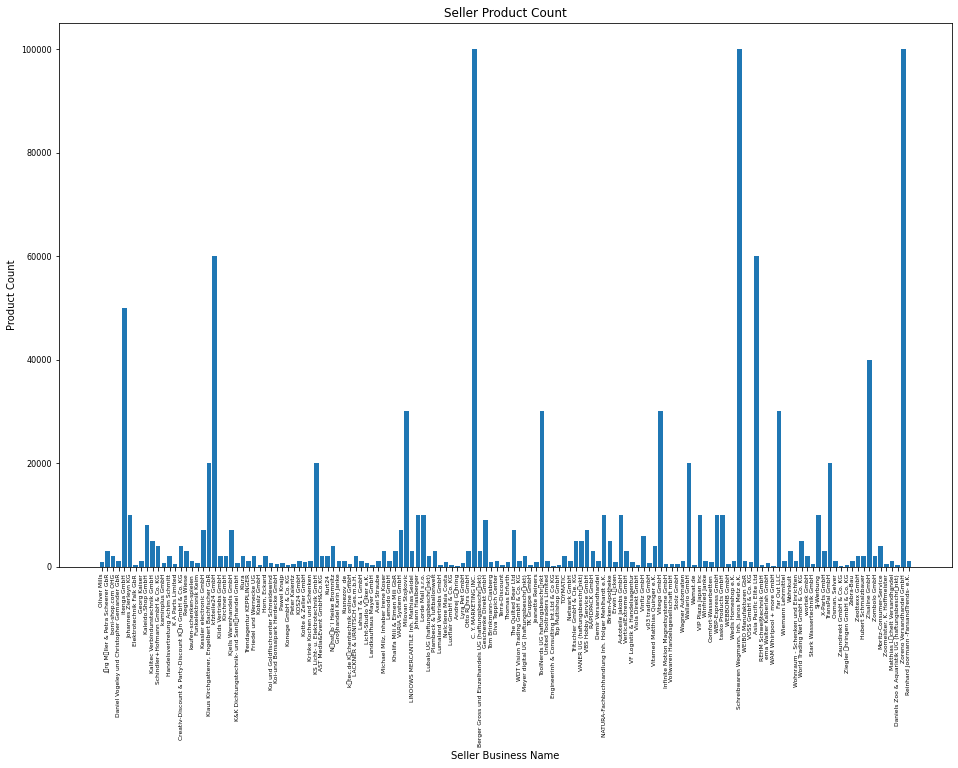

In [82]:
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
# Visualize the distribution of product counts for selected sellers
plt.figure(figsize=(16, 10))
plt.bar(selected_sellers['seller business name'], selected_sellers['sellerproductcount'])
plt.xlabel('Seller Business Name')
plt.ylabel('Product Count')
plt.title('Seller Product Count')
plt.xticks(fontsize=6,rotation=90)
plt.yticks(fontsize=8)
plt.show()

### Seller Product Count:
### The data shows a wide range of seller product counts among the selected sellers. The product counts range from as low as 100 to as high as 100,000. This indicates that the dataset includes sellers with a wide range of product offerings, from small-scale sellers with a limited number of products to larger sellers. The majority of selected sellers fall within the range of 500 to 10,000 products, suggesting that this is a common range for many sellers.
### Seller Brands:
### Each seller in the dataset is associated with a certain number of brands. The count of seller brands varies across the dataset, with some sellers having as few as 5 brands, while others have up to 16 brands. On average, sellers in this dataset seem to have around 14 brands. This suggests that sellers typically offer products from multiple brands, enabling them to cater to different customer preferences and product categories. Some sellers may specialize in specific brands or product categories, while others offer a broader range of brands.

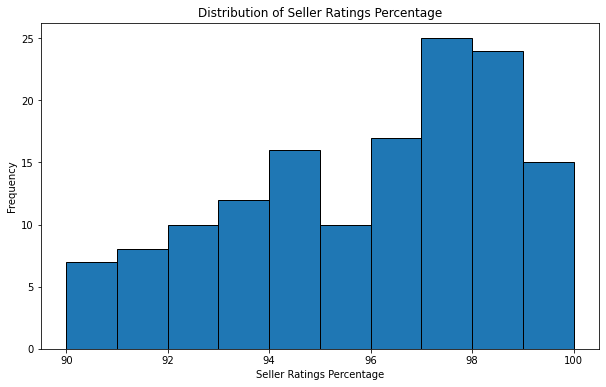

In [83]:
# Histogram - Seller Ratings Percentage
plt.figure(figsize=(10, 6))
plt.hist(selected_sellers['sellerratings_percentage'], bins=10, edgecolor='black')
plt.xlabel('Seller Ratings Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Seller Ratings Percentage')
plt.show()

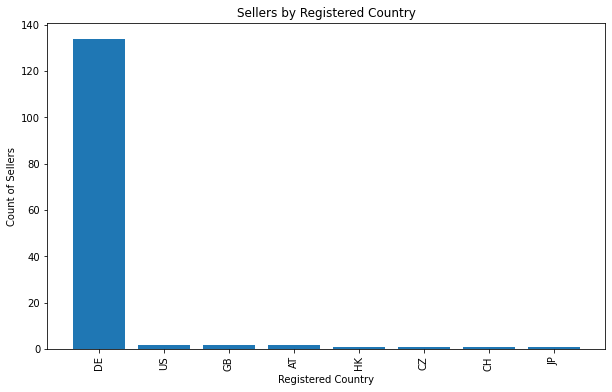

In [84]:
# Bar Plot - Registered Country
plt.figure(figsize=(10, 6))
country_counts = selected_sellers['registered_country'].value_counts()
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Registered Country')
plt.ylabel('Count of Sellers')
plt.title('Sellers by Registered Country')
plt.xticks(rotation=90)
plt.show()

### Registered Country:
### The majority of sellers in the dataset are registered in Germany (DE). This suggests that the dataset primarily focuses on German sellers or sellers who operate within the German market. However, there are also sellers from other countries such as the United Kingdom (GB), Austria (AT), Czech Republic (CZ), Switzerland (CH), Hong Kong (HK), and the United States (US). The presence of sellers from different countries highlights the international nature of the dataset and the potential diversity in terms of market reach and customer base.

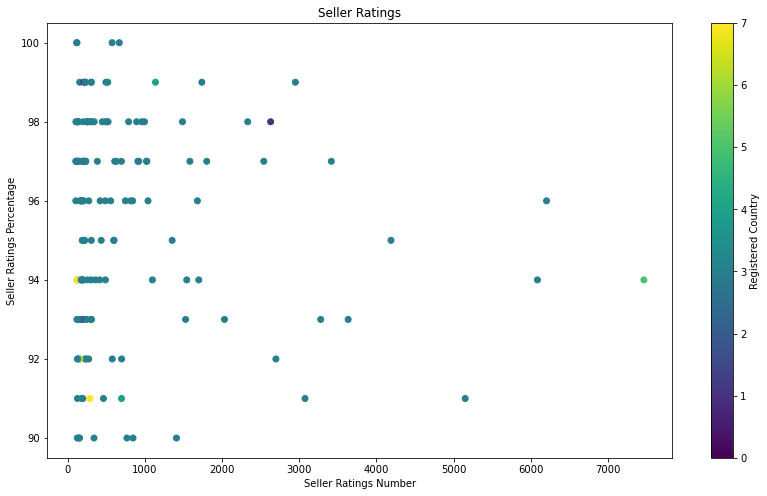

In [85]:
# Convert registered_country to numeric codes
selected_sellers['country_code'] = pd.Categorical(selected_sellers['registered_country']).codes
# Scatter Plot - Seller Ratings
plt.figure(figsize=(14, 8))
plt.scatter(selected_sellers['sellerratings_number'], selected_sellers['sellerratings_percentage'],c=selected_sellers['country_code'])
plt.xlabel('Seller Ratings Number')
plt.ylabel('Seller Ratings Percentage')
plt.title('Seller Ratings')
plt.colorbar(label='Registered Country')
plt.show()

### Seller Ratings:
### The dataset provides information about the ratings of sellers. Each seller has a ratings percentage and a corresponding number of ratings.The sellers in the dataset have different ratings percentages, ranging from 90% to 100%. This indicates the overall satisfaction level of customers who have rated the sellers. Higher ratings percentages suggest that sellers have received positive feedback and have a high level of customer satisfaction. The number of ratings for each seller varies, with some sellers having as few as 4 ratings, while others have an extensive number of ratings, exceeding 50,000. Higher numbers of ratings generally indicate more customer interactions and experiences with the sellers. It can help identify sellers with higher customer satisfaction.

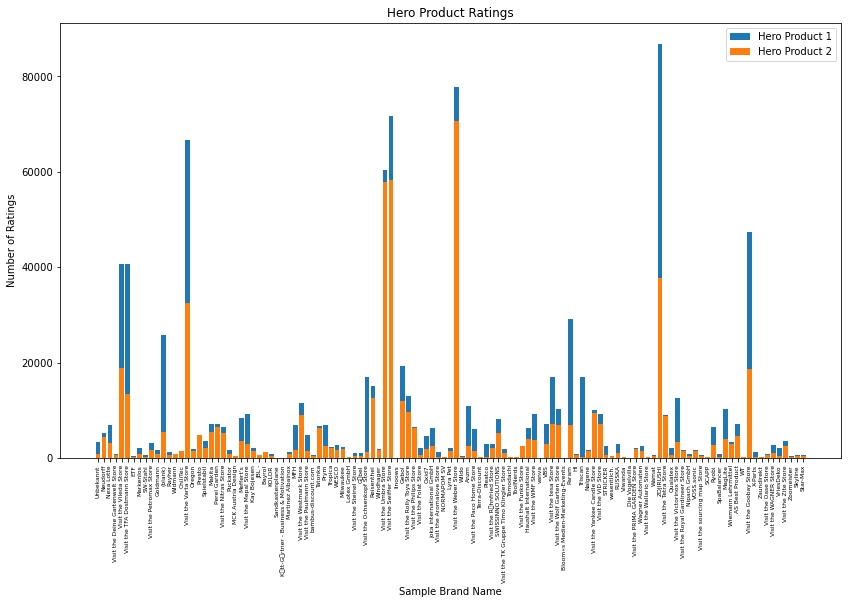

In [86]:
# Bar Plot - Hero Product Ratings
plt.figure(figsize=(14, 8))
plt.bar(selected_sellers['Sample brand name'], selected_sellers['Hero Product 1 #ratings'], label='Hero Product 1')
plt.bar(selected_sellers['Sample brand name'], selected_sellers['Hero Product 2 #ratings'], label='Hero Product 2')
plt.xlabel('Sample Brand Name')
plt.ylabel('Number of Ratings')
plt.title('Hero Product Ratings')
plt.xticks(fontsize=6,rotation=90)
plt.legend()
plt.show()

### Hero Product Ratings:
### The dataset includes two hero products for each seller, and for these hero products, the number of ratings varies. The range of ratings is quite wide, with some hero products having as few as 5 ratings, while others have a significantly higher number of ratings, reaching up to 100,000. The average ratings for the hero products appear to be relatively high, with ratings percentages ranging from 90% to 100%. This indicates that the hero products generally have positive feedback from customers. Hero products typically represent the flagship or best-selling products for sellers. High ratings indicate positive customer feedback and satisfaction with these products.

### Sample Brand:
### The dataset includes a column indicating a sample brand name associated with each seller. Some sellers have products from well-known brands such as Neudorff, Nexa Lotte, Prym, Tetra, and others. These established brand names suggest that the sellers offer products from reputable companies. However, there are also instances where the sample brand is labeled as "unknown" or left blank. This could indicate that some sellers offer products from lesser-known brands or that the brand information was not provided in the dataset. Exploring the distribution and frequency of different sample brand names can provide insights into the brand preferences among sellers in the dataset.